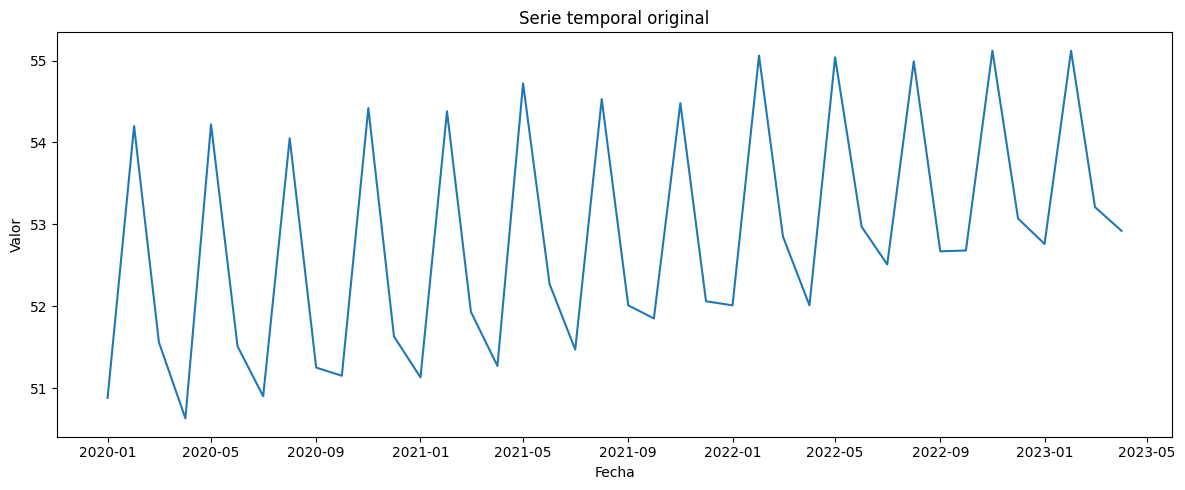

Frecuencia detectada: MS
Periodo visual estimado: 12


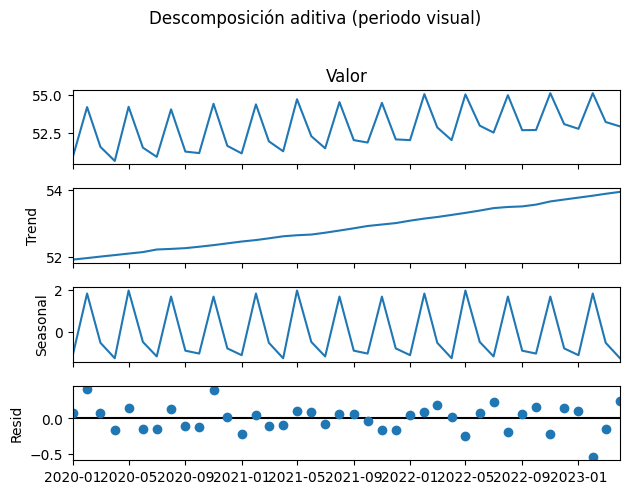

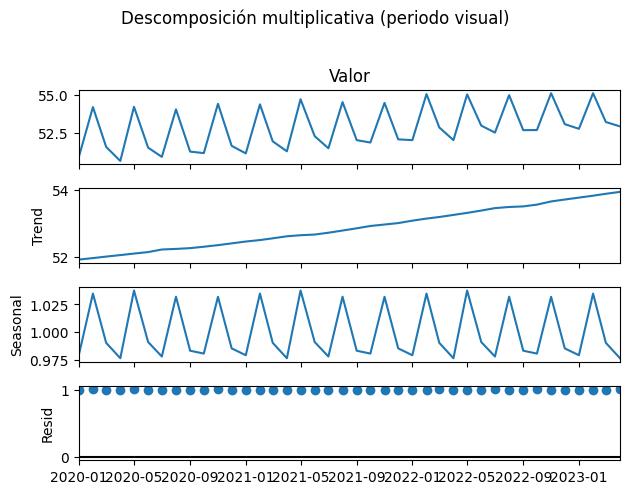

Varianza residuos (Aditivo, periodo visual): 0.0320721437295416
Varianza residuos (Multiplicativo, periodo visual): 1.2581202972634838e-05
Periodo determinado (ACF): 3


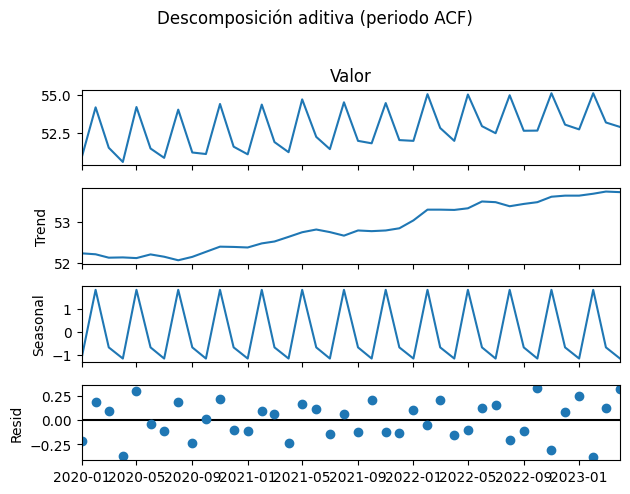

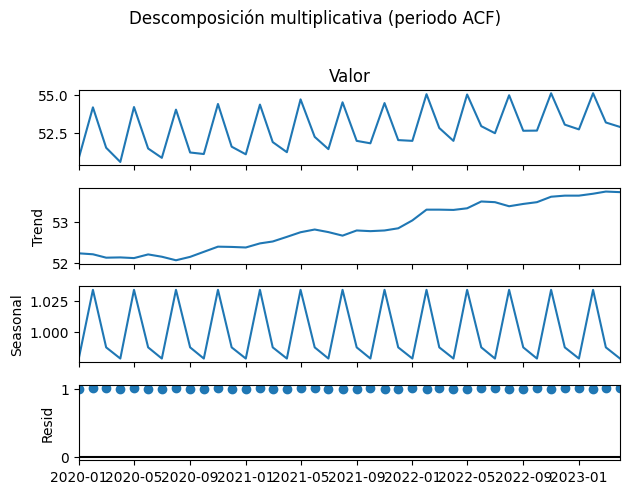

Varianza residuos (Aditivo, periodo ACF): 0.0356594878578218
Varianza residuos (Multiplicativo, periodo ACF): 1.418124760588789e-05

Comparación de varianza de residuos (menor = mejor):
                           Caso  Varianza_residuos
Multiplicativo - periodo visual           0.000013
   Multiplicativo - periodo ACF           0.000014
       Aditivo - periodo visual           0.032072
          Aditivo - periodo ACF           0.035659

Mejor ajuste (menor varianza): Multiplicativo - periodo visual


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf


# =========================
# Carga
# =========================
df = pd.read_csv("Tarea Tema 2 - Descomposicion y Periodo.csv")
df["Fecha"] = pd.to_datetime(df["Fecha"])
df = df.set_index("Fecha").sort_index()

df = df.asfreq("MS")

serie = df["Valor"].astype(float)

if serie.isna().any():
    serie = serie.interpolate(method="linear")


# =========================
# Serie original
# =========================
plt.figure(figsize=(12, 5))
plt.plot(serie)
plt.title("Serie temporal original")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.tight_layout()
plt.show()

freq = pd.infer_freq(serie.index)
print("Frecuencia detectada:", freq)


# =========================
# Periodo visual
# =========================
periodo_visual = 12
print("Periodo visual estimado:", periodo_visual)

dec_add_v = seasonal_decompose(serie, model="additive", period=periodo_visual, extrapolate_trend="freq")
dec_mul_v = seasonal_decompose(serie, model="multiplicative", period=periodo_visual, extrapolate_trend="freq")

dec_add_v.plot()
plt.suptitle("Descomposición aditiva (periodo visual)", y=1.02)
plt.tight_layout()
plt.show()

dec_mul_v.plot()
plt.suptitle("Descomposición multiplicativa (periodo visual)", y=1.02)
plt.tight_layout()
plt.show()

var_add_v = np.var(dec_add_v.resid.dropna())
var_mul_v = np.var(dec_mul_v.resid.dropna())

print("Varianza residuos (Aditivo, periodo visual):", var_add_v)
print("Varianza residuos (Multiplicativo, periodo visual):", var_mul_v)


# =========================
# Periodo (punto 9) por ACF
# =========================
acf_vals = acf(serie.dropna(), nlags=24, fft=True)
periodo_acf = max(range(2, 25), key=lambda k: acf_vals[k])
print("Periodo determinado (ACF):", periodo_acf)


# =========================
# Descomposición con periodo ACF
# =========================
dec_add_a = seasonal_decompose(serie, model="additive", period=periodo_acf, extrapolate_trend="freq")
dec_mul_a = seasonal_decompose(serie, model="multiplicative", period=periodo_acf, extrapolate_trend="freq")

dec_add_a.plot()
plt.suptitle("Descomposición aditiva (periodo ACF)", y=1.02)
plt.tight_layout()
plt.show()

dec_mul_a.plot()
plt.suptitle("Descomposición multiplicativa (periodo ACF)", y=1.02)
plt.tight_layout()
plt.show()

var_add_a = np.var(dec_add_a.resid.dropna())
var_mul_a = np.var(dec_mul_a.resid.dropna())

print("Varianza residuos (Aditivo, periodo ACF):", var_add_a)
print("Varianza residuos (Multiplicativo, periodo ACF):", var_mul_a)


# =========================
# Comparación final
# =========================
resumen = pd.DataFrame({
    "Caso": [
        "Aditivo - periodo visual",
        "Multiplicativo - periodo visual",
        "Aditivo - periodo ACF",
        "Multiplicativo - periodo ACF",
    ],
    "Varianza_residuos": [var_add_v, var_mul_v, var_add_a, var_mul_a]
}).sort_values("Varianza_residuos").reset_index(drop=True)

print("\nComparación de varianza de residuos (menor = mejor):")
print(resumen.to_string(index=False))
print("\nMejor ajuste (menor varianza):", resumen.loc[0, "Caso"])